In [1]:
import psycopg2 as pg
import pandas.io.sql as psql

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Render our plots inline
%matplotlib inline

# set figure size
plt.rcParams['figure.figsize'] = (15, 5)

pd.options.display.float_format = '{:.2f}'.format

pd.set_option('display.max_colwidth', -1)

# Read from database

In [3]:
connection_users = pg.connect("host='1c_postgres_db' port=5432 dbname=postgres user=postgres")
connection_updates = pg.connect("host='3c_postgres_db' port=5432 dbname=postgres user=postgres")

In [4]:
df_users = pd.read_sql_query('select * from twitter_users',
                       con=connection_users)

In [5]:
df = pd.read_sql_query('select * from twitter_updates',
                       con=connection_updates, 
                       parse_dates=['status_created_at'],)

# Data overview

### User data

In [6]:
df_users.head(5)

,user_id,user_name,user_location,account_created_at,statuses_count,favorites_count,followers_count,friends_count,verified
0,1177221975921610753,Bobby D,NC,2019-09-26 14:03:56,79786,10942,20128,20025,False
1,1003204424,steven creager,,2012-12-11 03:30:10,1694,166,1698,3881,False
2,898652658516578304,Chris,"Derry, PA USA",2017-08-18 21:07:44,45547,40543,5946,6192,False
3,1208452508777164800,Mimialoha,"Oklahoma, USA",2019-12-21 18:22:08,19418,28698,1308,1689,False
4,809097998668075010,CathyS,"North Carolina, USA",2016-12-14 18:09:30,1479,47175,1401,1690,False


In [7]:
df_users.describe().drop('count')

,statuses_count,favorites_count,followers_count,friends_count
mean,21562.62,16220.81,24475.17,23557.26
std,78051.79,39418.01,133776.56,123961.93
min,1.00,0.00,0.00,7.00
25%,429.00,628.75,202.75,647.25
50%,1678.00,1752.00,652.00,1568.50
75%,8288.75,14140.75,1623.75,3144.00
max,502175.00,240503.00,865717.00,802516.00


In [8]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 9 columns):
user_id               42 non-null object
user_name             42 non-null object
user_location         42 non-null object
account_created_at    42 non-null datetime64[ns]
statuses_count        42 non-null int64
favorites_count       42 non-null int64
followers_count       42 non-null int64
friends_count         42 non-null int64
verified              42 non-null bool
dtypes: bool(1), datetime64[ns](1), int64(4), object(3)
memory usage: 2.8+ KB


### User updates

In [9]:
rows, columns = df.shape
print(rows,'Rows x ', columns, 'Columns')

1303 Rows x  11 Columns


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
status_id            1303 non-null object
user_id              1303 non-null object
status_created_at    1303 non-null datetime64[ns]
text                 1303 non-null object
retweet_count        1303 non-null int64
anger                1303 non-null float64
disgust              1303 non-null float64
fear                 1303 non-null float64
joy                  1303 non-null float64
sadness              1303 non-null float64
surprise             1303 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1), object(3)
memory usage: 112.1+ KB


In [25]:
df.describe().drop('count').drop(['retweet_count'], axis=1).style.format({'anger': "{:.1%}", 'disgust': "{:.1%}", 'fear': "{:.1%}", 'joy': "{:.1%}", 'sadness': "{:.1%}", 'surprise': "{:.1%}"})

,anger,disgust,fear,joy,sadness,surprise,nr_of_status_in_dataset
mean,1.3%,0.6%,11.6%,58.9%,3.8%,23.8%,756.461
std,2.8%,1.7%,17.2%,33.0%,10.5%,26.8%,239.603
min,0.0%,0.0%,0.0%,0.1%,0.0%,0.0%,390
25%,0.1%,0.0%,1.3%,28.5%,0.0%,0.0%,390
50%,0.3%,0.1%,4.6%,60.4%,0.5%,14.2%,913
75%,1.3%,0.4%,13.6%,94.0%,2.7%,40.4%,913
max,30.4%,27.1%,98.7%,100.0%,99.4%,99.4%,913


In [12]:
df.head()

,status_id,user_id,status_created_at,text,retweet_count,anger,disgust,fear,joy,sadness,surprise
0,849487356289839106,18500852,2017-04-05 05:02:23,Thanks so much! https://t.co/xTL6fY7Fd7,6,0.01,0.00,0.00,0.29,0.00,0.70
1,848290670926286848,18500852,2017-04-01 21:47:11,@BAFastestMan Promise to let you know once it does!,1,0.02,0.01,0.14,0.16,0.02,0.65
2,848289925552373762,18500852,2017-04-01 21:44:13,@CalzerBrown Thank you Callum!,1,0.01,0.00,0.12,0.76,0.00,0.11
3,848289528787939328,18500852,2017-04-01 21:42:38,RT @khalisound: Dope tone HELIUM @MikeyWax Download on iTunes https://t.co/F7sGV62wiW,2,0.01,0.01,0.06,0.08,0.04,0.80
4,848289342070157316,18500852,2017-04-01 21:41:54,@IamShawty25 Thx Becca!,2,0.01,0.01,0.14,0.30,0.05,0.49


# Number of users

In [13]:
df_user_id_count = df['user_id'].nunique()
df_user_id_count

2

# Number of tweets per user

In [14]:
df['nr_of_status_in_dataset'] = df[['user_id', 'status_id']].groupby('user_id').transform('count')
df.head()

,status_id,user_id,status_created_at,text,retweet_count,anger,disgust,fear,joy,sadness,surprise,nr_of_status_in_dataset
0,849487356289839106,18500852,2017-04-05 05:02:23,Thanks so much! https://t.co/xTL6fY7Fd7,6,0.01,0.00,0.00,0.29,0.00,0.70,390
1,848290670926286848,18500852,2017-04-01 21:47:11,@BAFastestMan Promise to let you know once it does!,1,0.02,0.01,0.14,0.16,0.02,0.65,390
2,848289925552373762,18500852,2017-04-01 21:44:13,@CalzerBrown Thank you Callum!,1,0.01,0.00,0.12,0.76,0.00,0.11,390
3,848289528787939328,18500852,2017-04-01 21:42:38,RT @khalisound: Dope tone HELIUM @MikeyWax Download on iTunes https://t.co/F7sGV62wiW,2,0.01,0.01,0.06,0.08,0.04,0.80,390
4,848289342070157316,18500852,2017-04-01 21:41:54,@IamShawty25 Thx Becca!,2,0.01,0.01,0.14,0.30,0.05,0.49,390


In [15]:
df_user_id = df[['user_id', 'status_id']].groupby('user_id').agg('count')

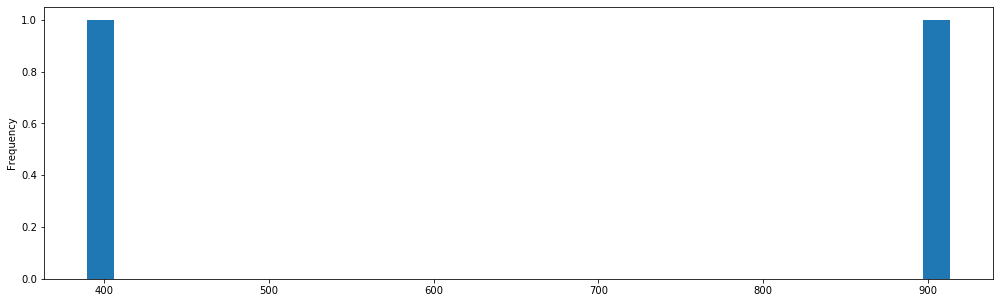

In [16]:
df_user_id.plot(kind='hist', legend=False, bins=32, figsize=(17,5))

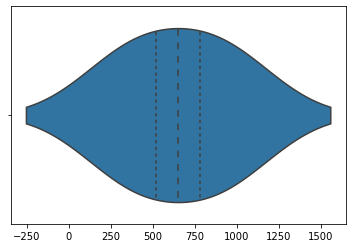

In [17]:
sns.violinplot(x=df_user_id, inner='quartiles', figsize=(25,5))

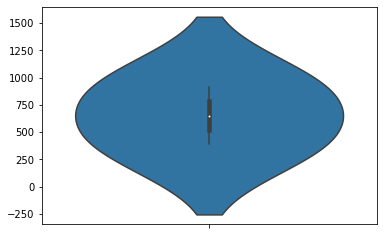

In [18]:
sns.violinplot(y=df_user_id)

In [19]:
df_user_id.describe()

,status_id
count,2.00
mean,651.50
std,369.82
min,390.00
25%,520.75
50%,651.50
75%,782.25
max,913.00


In [20]:
df_user_id.tail()

,status_id
user_id,
18500852,390
799609398721122304,913


# Number of unique status updates

In [21]:
rows, columns = df.shape
df_status_id_count = df['status_id'].nunique()
print(df_status_id_count, '/', rows, 'status updates are unique')

1303 / 1303 status updates are unique


# Emotions of all users over time

In [22]:
cm = sns.light_palette("green", as_cmap=True)

df_avg_emotions_per_year = df.drop(['retweet_count', 'text', 'nr_of_status_in_dataset'], axis=1)

df_avg_emotions_per_year['year'] = df_avg_emotions_per_year['status_created_at'].dt.year

df_avg_emotions_per_year = df_avg_emotions_per_year.groupby(['year']).agg('mean')
df_avg_emotions_per_year.style.background_gradient(cmap=cm, axis=1)

,anger,disgust,fear,joy,sadness,surprise
year,,,,,,
2017,0.0187978,0.00808514,0.109216,0.447521,0.0563853,0.359995
2019,0.0109376,0.00464511,0.118466,0.643305,0.031441,0.191205
2020,0.0118584,0.00237629,0.128598,0.708456,0.0186693,0.130042


[Text(0, 0, '2017'), Text(0, 0, '2019'), Text(0, 0, '2020')]

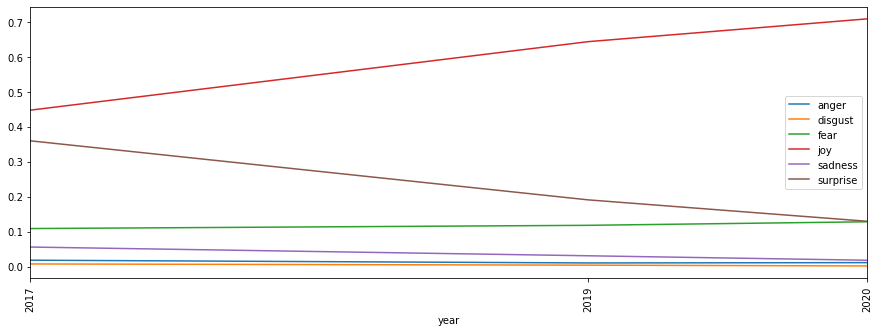

In [23]:
ax = df_avg_emotions_per_year.plot(figsize=(15,5))
ax.set_xticks(df_avg_emotions_per_year.index)
ax.set_xticklabels(df_avg_emotions_per_year.index, rotation=90)

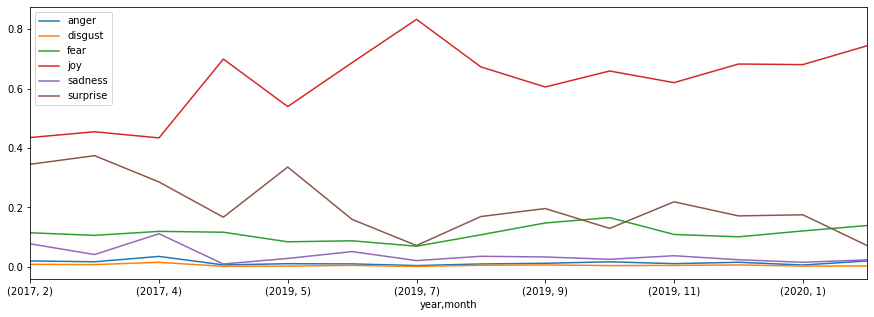

In [24]:
df_avg_emotions_over_time = df.drop(['retweet_count', 'text', 'nr_of_status_in_dataset'], axis=1)

df_avg_emotions_over_time['year'] = df_avg_emotions_over_time['status_created_at'].dt.year
df_avg_emotions_over_time['month'] = df_avg_emotions_over_time['status_created_at'].dt.month

df_all_emotions = df_avg_emotions_over_time.groupby(['year', 'month']).agg('mean')
df_all_emotions.plot(figsize=(15,5))